## **Import libraries**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import layers, models

## **Data Preparation**

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data() #Default: 85% training 15% testing

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

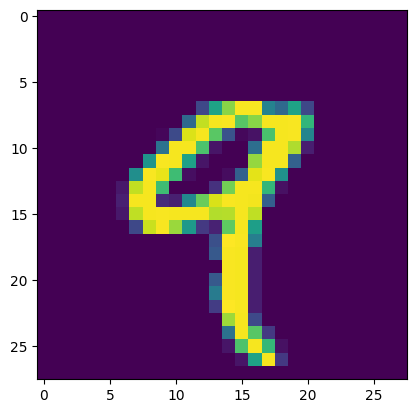

In [5]:
plt.imshow(x_train[4])

In [6]:
y_train[4] #x_train[0] shows number 5

9

In [7]:
x_train[0][5][13] #image 0, row 5, pixel 13

18

## **Data Transformations**

In [8]:
#convert numbers in each cell from 0-255 -> 0.0-1.0
x_train_normalized = x_train/255.0
x_test_normalized = x_test/255.0

In [9]:
x_train_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

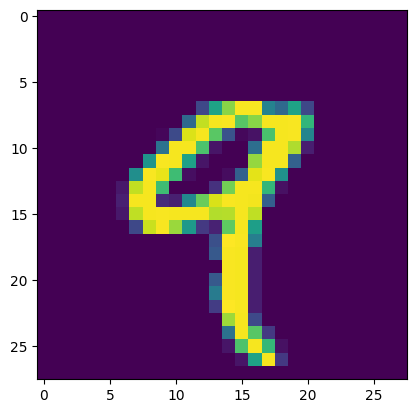

In [10]:
plt.imshow(x_train_normalized[4])

In [11]:
x_train_normalized[0][5][13] #image 0, row 5, pixel 13 is now transformed from 18 into 0.07...

0.07058823529411765

## **Define functions to visualize & train model**

In [12]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

        plt.legend()

In [13]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential()

    # Convolutional Layer 1: 32 filters, each of size (3, 3), ReLU activation
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    
    # Max Pooling Layer 1: Downsample the output of the first convolutional layer
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2: 64 filters, each of size (3, 3), ReLU activation
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    
    # Max Pooling Layer 2: Downsample the output of the second convolutional layer
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers before the fully connected layers
    model.add(tf.keras.layers.Flatten())

    # Fully Connected Layer 1: 128 nodes, ReLU activation
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))

    # Dropout regularization rate: 0.1
    model.add(tf.keras.layers.Dropout(rate=0.1))

    # Output Layer: 10 nodes for digits 0 to 9, softmax activation
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [14]:
def train_model(model, train_features, train_label, epochs, batch_size, validation_split):
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, 
                      shuffle=True, validation_split=validation_split)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist 

## **Classify and Visualize results**

In [16]:
# Hyperparameters.
epochs = 10
batch_size = 1000
validation_split = 0.001

Epoch 1/10
60/60 [==============================] - 23s 374ms/step - loss: 0.6281 - accuracy: 0.8285 - val_loss: 0.0820 - val_accuracy: 0.9667
Epoch 2/10
60/60 [==============================] - 21s 346ms/step - loss: 0.1378 - accuracy: 0.9588 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 3/10
60/60 [==============================] - 21s 347ms/step - loss: 0.0884 - accuracy: 0.9730 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 4/10
60/60 [==============================] - 21s 345ms/step - loss: 0.0675 - accuracy: 0.9799 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 5/10
60/60 [==============================] - 20s 336ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 6/10
60/60 [==============================] - 20s 331ms/step - loss: 0.0478 - accuracy: 0.9857 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/10
60/60 [==============================] - 20s 331ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0078 - val_accuracy: 1.0000

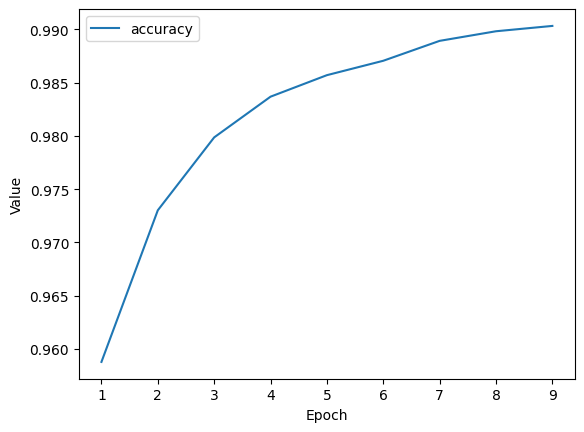

In [15]:
my_model = create_model()
#train model on the normalized dataset
epochs, hist = train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)
my_model.save('model.h5')

#plot metrics vs epochs
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

## **Model performance accuracy**

313/313 [==============================] - 2s 5ms/step


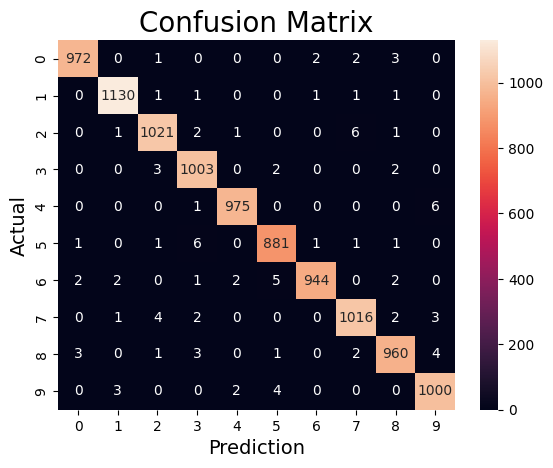

In [16]:
y_pred = my_model.predict(x_test_normalized)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_labels, labels=[0,1,2,3,4,5,6,7,8,9])
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual',fontsize=14)
plt.xlabel('Prediction',fontsize=14)
plt.title('Confusion Matrix',fontsize=20)
plt.show()

In [17]:
# Evaluate against the test set.
my_model.evaluate(x_test_normalized, y_test, batch_size)

10/10 [==============================] - 1s 69ms/step - loss: 0.0301 - accuracy: 0.9902


[0.03006720542907715, 0.9901999831199646]

In [18]:
import numpy as np
from PIL import Image
from skimage.transform import resize

In [19]:
x_test_new = []
y_test_new = np.array([0,1,2,3,4,5,6,7,8,9], dtype='uint8')

In [20]:
for i in range(10):
  # Open the image
  image = Image.open(str(i)+'.png')

  # Convert the image to grayscale
  image_gray = image.convert('L')

  # Convert the image to a NumPy array
  image_array = np.array(image_gray)
  resized_array = resize(image_array, (28, 28), anti_aliasing=True) #already normalized
  x_test_new.append(resized_array)

In [21]:
x_test_new = np.array(x_test_new).tolist()
x_test_new = np.array(x_test_new)

In [22]:
my_model.evaluate(x_test_new, y_test_new)

1/1 [==============================] - 0s 27ms/step - loss: 0.2960 - accuracy: 0.9000


[0.2959974706172943, 0.8999999761581421]

1/1 [==============================] - 0s 36ms/step


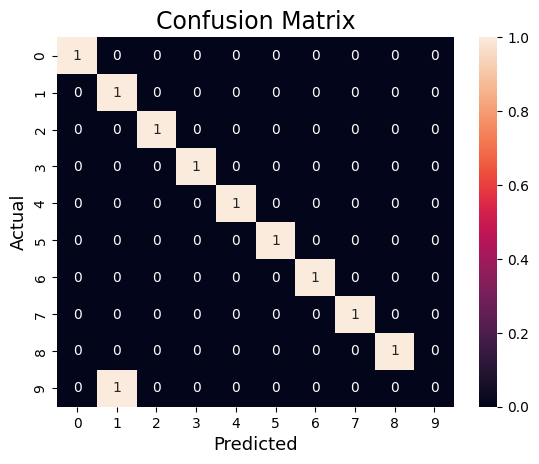

In [23]:
y_pred = my_model.predict(x_test_new)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_new, y_pred_labels, labels=[0,1,2,3,4,5,6,7,8,9])
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0,1,2,3,4,5,6,7,8,9],
            yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

1/1 [==============================] - 0s 126ms/step
Predicted MNIST label: 2


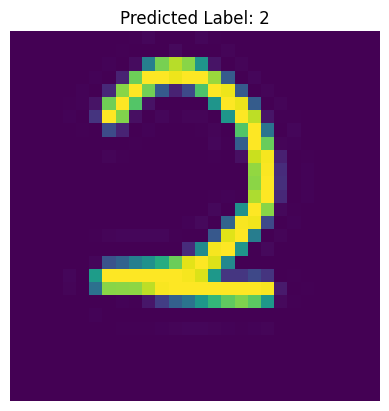

1/1 [==============================] - 0s 68ms/step
Predicted MNIST label: 4


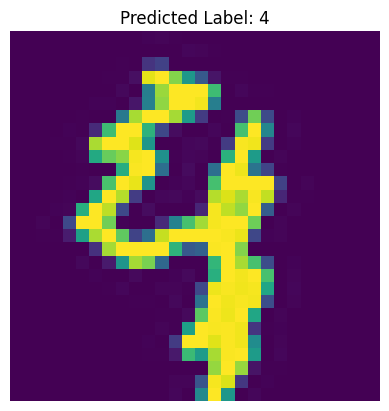

1/1 [==============================] - 0s 66ms/step
Predicted MNIST label: 8


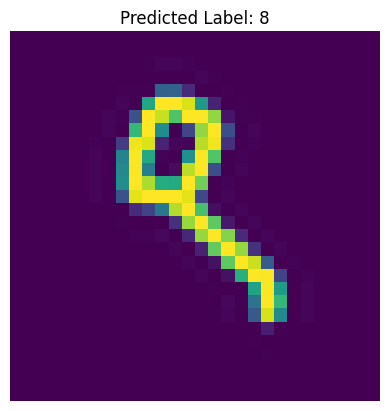

1/1 [==============================] - 0s 74ms/step
Predicted MNIST label: 7


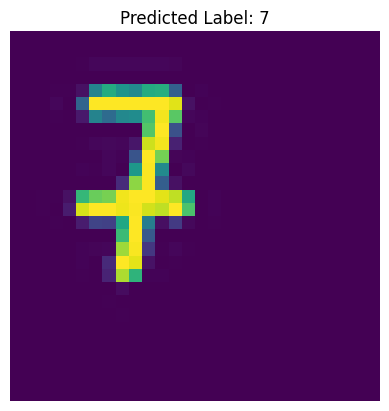

In [ ]:
import sys
import numpy as np
import tensorflow as tf
from PyQt5.QtWidgets import QApplication, QMainWindow, QWidget, QVBoxLayout, QPushButton
from PyQt5.QtGui import QPainter, QPen, QImage, QColor
from PyQt5.QtCore import Qt, QPoint
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Assuming you have your MNIST model loaded and ready to use
def classify_mnist_image(image):
    my_model = tf.keras.models.load_model("model.h5")
    preprocessed_image = image
    
    prediction = my_model.predict(preprocessed_image)
    return np.argmax(prediction[0])

class DrawingCanvas(QWidget):
    def __init__(self):
        super().__init__()
        self.image = QImage(500, 500, QImage.Format_RGB32)
        self.image.fill(Qt.white)
        self.last_point = QPoint()

    def paintEvent(self, event):
        painter = QPainter(self)
        painter.drawImage(self.rect(), self.image, self.rect())

    def mousePressEvent(self, event):
        if event.button() == Qt.LeftButton:
            self.last_point = event.pos()

    def mouseMoveEvent(self, event):
        if event.buttons() & Qt.LeftButton:
            painter = QPainter(self.image)
            painter.setPen(QPen(Qt.black, 35, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))
            painter.drawLine(self.last_point, event.pos())
            self.last_point = event.pos()
            
            # Draw a light black trail over the cursor
            for i in range(5):
                alpha = 100 - i  # Decrease opacity for each line
                painter.setPen(QPen(QColor(0, 0, 0, alpha), 60, Qt.SolidLine, Qt.RoundCap, Qt.RoundJoin))
                painter.drawLine(self.last_point + QPoint(i, i), event.pos() + QPoint(i, i))
                painter.drawLine(self.last_point - QPoint(i, i), event.pos() - QPoint(i, i))

            self.update()

    def clear_canvas(self):
        self.image.fill(Qt.white)
        self.update()

    def classify_canvas(self):
        preprocessed_image = self.preprocess_image()
        predicted_label = classify_mnist_image(preprocessed_image)
        print(f"Predicted MNIST label: {predicted_label}")
        self.plot_image(preprocessed_image[0], predicted_label)

    def preprocess_image(self):
        # Convert QImage to PIL Image
        pil_image = Image.fromqimage(self.image)

        # Convert the image to grayscale (L mode)
        pil_image = pil_image.convert("L")
        
        # Invert
        pil_image = ImageOps.invert(pil_image)
        
        # Resize to 28x28 pixels (MNIST image size)
        pil_image = pil_image.resize((28, 28), Image.LANCZOS)  # Use LANCZOS for resampling

        # Convert PIL Image to numpy array
        image_array = np.array(pil_image)

        # Normalize pixel values to [0, 1]
        image_array = image_array / 255.0

        # Add a batch dimension to the image
        image_array = np.expand_dims(image_array, axis=0)

        # Return the preprocessed image as a numpy array
        return image_array

    def plot_image(self, image_array, label):
        plt.imshow(image_array)
        plt.title(f"Predicted Label: {label}")
        plt.axis('off')
        plt.show()

class DrawingApp(QMainWindow):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.canvas = DrawingCanvas()

        self.clear_button = QPushButton('Clear Canvas', self)
        self.clear_button.clicked.connect(self.canvas.clear_canvas)

        self.classify_button = QPushButton('Classify', self)
        self.classify_button.clicked.connect(self.canvas.classify_canvas)

        layout = QVBoxLayout()
        layout.addWidget(self.canvas)
        layout.addWidget(self.clear_button)
        layout.addWidget(self.classify_button)

        container = QWidget()
        container.setLayout(layout)
        self.setCentralWidget(container)

        self.setGeometry(100, 100, 500, 600)
        self.setWindowTitle('MNIST Drawing App')


app = QApplication(sys.argv)
window = DrawingApp()
window.show()
sys.exit(app.exec_())
